<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
Distributions: Part II
              
</p>
</div>

Data Science Cohort Live NYC Nov 2023
<p>Phase 2</p>
<br>
<br>

<div align = "right">
<img src="Images/flatiron-school-logo.png" align = "right" width="200"/>
</div>
    
    

#### The normal distribution
- Why do people care so much about this distribution?

Sum of N independent, random variables each following same distribution:

$$ S = X_1 + X_2 + ... + X_N $$

- Each having same mean, variance, etc.
- **S** is a composite variable.

Let each $X_i$ be the result of a Bernoulli trial:

<img src = "Images/simple_bernoulli.png" width = 500>

- $S$ would be how many steps right under $N$ trials.
- What kind of distribution?

Binomial!
3 trials.

In [1]:
from scipy.stats import binom
import matplotlib.pyplot as plt
N = 3
p = 0.5

pmf_binomial = [(x, binom.pmf(x, n = N, p = p)) 
                for x in range(0,10)]

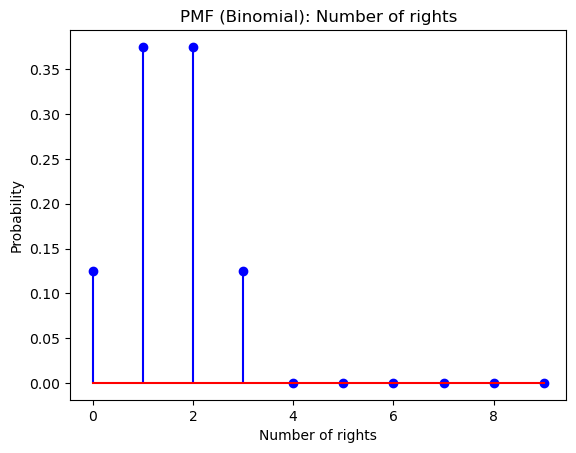

In [2]:
x,y = list(zip(*pmf_binomial))
plt.stem(x, y, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xlabel('Number of rights')
plt.ylabel('Probability')
plt.title('PMF (Binomial): Number of rights')
plt.show()

Plot it for actual distance deviation:

$$ d = n_R - n_L = n_R - (N-n_r)$$

In [3]:
import numpy as np
N = 3
p = 0.5

pmf_deviation = [(x - (N - x), binom.pmf(x, n = N, p = p)) 
                for x in np.arange(-5,5,1)]

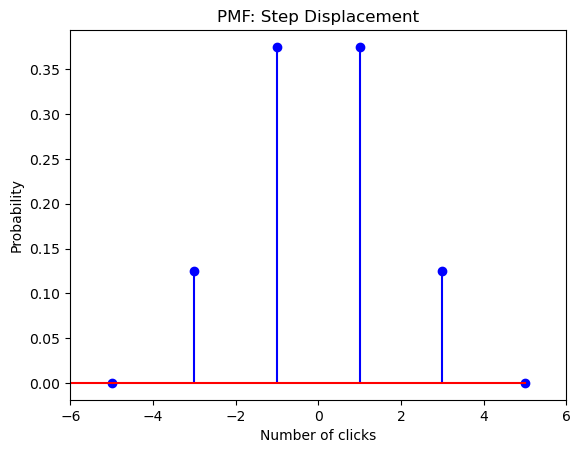

In [4]:
x,y = list(zip(*pmf_deviation))
plt.stem(x, y, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xlabel('Number of clicks')
plt.ylabel('Probability')
plt.title('PMF: Step Displacement')
plt.xlim(-6,6)
plt.show()

When $N$ gets sufficiently big:

In [5]:
from IPython.display import YouTubeVideo

galton_video = YouTubeVideo('Vo9Esp1yaC8', width = 800, height = 600)

In [6]:
display(galton_video)

- If make slits finer, and $N \rightarrow \infty$ :
- Becomes the continuous normal pdf.

$$ S = X_1 + X_2 + ... + X_N $$ 

follows normal distribution provided that each $X_i$:
- follows a population distribution:
    - Finite variance.
    - Defined mean.



**Most distributions satisfying weak requirements**:

Bernoulli was an underlying distribution that satisfied this.

Sum of random variables drawn from these distribution follows normal distribution as N goes large.

This is underneath why binomial approaches normal as $ N $ gets large:

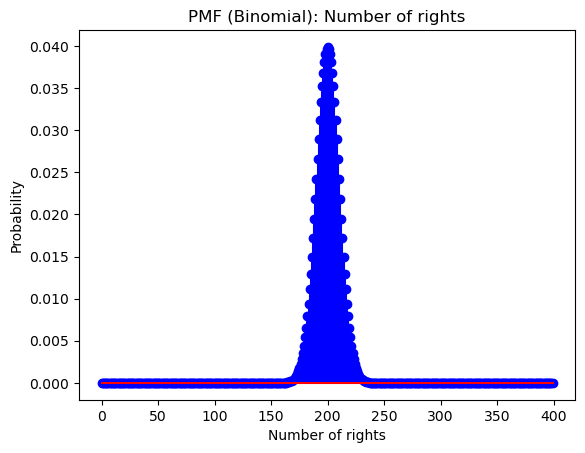

In [7]:
import numpy as np
N = 400
p = 0.5

pmf_largeN = [(x, binom.pmf(x, n = N, p = p)) 
                for x in np.arange(0, N)]

x,y = list(zip(*pmf_largeN))
plt.stem(x, y, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xlabel('Number of rights')
plt.ylabel('Probability')
plt.title('PMF (Binomial): Number of rights')
plt.show()


#### Known as: The central limit theorem

Take N = 200 samples of waiting times of drivers at a toll:

- Follows exponential distribution with average wait time $\tau$
- Has finite variance $\tau^2$.

In [8]:
from scipy.stats import expon

#assume population mean 3 minutes
pop_mean = 3

wait_time_sample = expon.rvs(scale = pop_mean, size = 50)

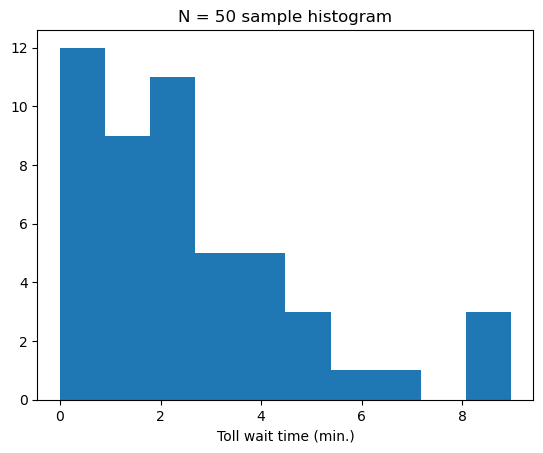

In [9]:
plt.hist(wait_time_sample)
plt.xlabel('Count')
plt.xlabel('Toll wait time (min.)')
plt.title('N = 50 sample histogram')
plt.show()


Obviously, not normal distributed.

- Want statistics/uncertainty of the **sample mean** as we repeat for many trials of samples with N = 50.

$$ \bar{T} = \frac{1}{N}\sum_{i=1}^{N}T_i $$

- Here N = 50
- Apart from factor of (1/N), this is a sum of random variables!

##### Create a list of 10,000 trials of these N = 50 samples from exponential distribution:
- get $N = 50$ sample
- get mean of times in small sample (this is a statistic $\bar{T}$)
- Do this 10,000 times

In [10]:
pop_mean = 3
many_sample_trials = [expon.rvs(loc = pop_mean/2, scale = pop_mean/2, size = 50) for trial in range(10000)]
many_sample_trials[0:2]

[array([2.10371636, 3.07554889, 2.27666801, 1.78086906, 1.7388174 ,
        1.86058004, 3.58099204, 2.71382984, 1.93256549, 2.08935669,
        1.57860537, 1.84670038, 2.39531242, 3.6614968 , 1.61399492,
        3.58343629, 1.58420823, 2.47024808, 3.48159684, 1.99007644,
        1.62840612, 2.39169246, 1.51051326, 1.84480604, 9.71093004,
        2.04942573, 1.98582752, 2.29313895, 1.75310788, 3.99139686,
        1.91620521, 3.11699305, 2.44270178, 2.84650539, 1.93747974,
        1.85614028, 2.23247947, 1.54977226, 1.80342431, 5.03755706,
        2.71029233, 1.59151859, 4.34548952, 1.91002665, 4.00658603,
        1.93551059, 3.616006  , 1.58167172, 2.55456957, 1.95685654]),
 array([1.909341  , 2.2872454 , 3.62515762, 4.7065458 , 1.64706983,
        2.57732255, 1.94195111, 1.5036437 , 2.92610323, 3.93144652,
        2.98496289, 3.46328469, 1.98676806, 2.07371229, 6.01962047,
        1.59758142, 1.55786797, 1.61209795, 1.60908304, 3.50538087,
        1.75098947, 3.50124405, 6.0458771 , 3.

Return list of 10,000 sample means:

In [11]:
sample_mean_list = [sample.mean() for sample in many_sample_trials]
len(sample_mean_list)
sample_mean_list

[2.54931301012232,
 3.0190782114390267,
 3.059845674475821,
 3.208383466161737,
 3.0684645413383542,
 3.054493041671918,
 3.4136595222879413,
 2.6255384561822344,
 3.220603552205682,
 2.7559840400275277,
 2.855131848552622,
 3.223164657034703,
 3.0948046227955888,
 3.0238527005730793,
 3.04178496608103,
 3.0151387340789766,
 3.1801756516192565,
 3.0016112527662164,
 3.1303263301470334,
 2.864431455991759,
 3.183238366865105,
 2.9402536230327656,
 2.8544612357763297,
 2.920067086817074,
 2.892280723457535,
 2.9646217401796506,
 2.6333151401347177,
 2.8320212783803673,
 3.0275396219075206,
 2.86571229284436,
 2.831439809864343,
 3.0026061230755596,
 2.6337523375072185,
 2.6214694795569273,
 3.0117422771533136,
 2.9878453805145697,
 2.879983554102068,
 2.8628322853740893,
 3.1235180668873737,
 2.8200813635255035,
 3.2782200848834946,
 3.451810777445934,
 2.6794489724838626,
 2.6940432059951807,
 3.1217716156651854,
 3.033584680993188,
 3.0909638015548806,
 3.053561583250301,
 3.1778183242

What does the distribution of means look like?

$$ \bar{T} = \frac{1}{N}\sum_{i=1}^{N}T_i $$

Note: mean is sum of random variables drawn from exponential distribution up to a factor

Construct histogram of $\bar{T}$:

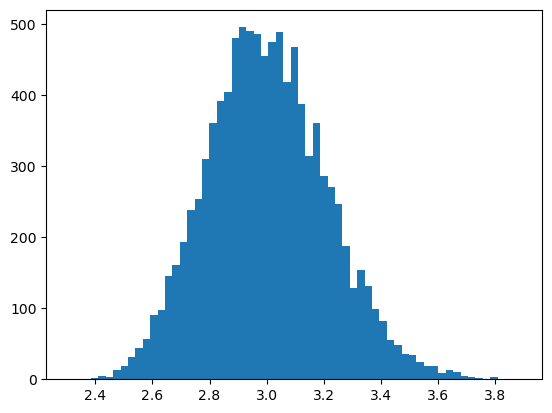

In [12]:
plt.hist(sample_mean_list, bins = "auto")
plt.show()

**The distribution of mean of a sample follow normal distribution**

- Regardless of underlying population distribution.

This is a very large reason why normal distribution is so important!

#### Standard Normal Distribution

- Often useful to rescale normal by mean/std.
- New rescaled normal has mean of 0 and variance of 1.
- Z-distribution.

We simply subtract the mean $\mu$ from each value and then divide by the standard deviation $\sigma$:

$$z = \frac{x - \mu}{\sigma}$$

We call this process **standardization**.

Mathematical form for pdf:
$$ N(x | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}} $$

- $\mu$ is mean.
- $\sigma$ is standard deviation.

Scaled transformation:
$$ \frac{1}{\sqrt{2\pi}}e^{-\frac{z^2}{2}} $$

<center><img src = "Images/rescale_normal.png" width = 500></center>

#### $z$-Score: why this transformation is useful

A **$z$-score** for a data point $x$ (in a normal distribution) is simply the distance to the mean in units of standard deviations

$$\large z = \frac{x - \mu}{\sigma}$$

Transforming observations on original scale to z-score:
- we can see how unlikely a value is. 
- i.e. how many stds away from center of normal

<center><img src = "Images/rescale_normal.png" width = 500></center>

#### The Empirical Rule

- $68\%$ of the values of a normal distribution: lie within 1 standard deviation ($\sigma$) of the mean.
- $95\%$ within $2\sigma$.
- $99.7\%$ within $3\sigma$.  

#### Using .cdf to get empirical rule:

Instead of looking at empirical rule, get probability given z-score:

I have $X$ distributed normally with mean 5 and standard deviation 2:
- How many standard deviations from center of distribution is $X = 9$?
- What percentage of the values lie within a range $X = 1$ and $X=9$?


In [13]:
# calculate z-score:
z_score = (1 - 5)/2
z_score

-2.0

Now want $$ P(- Z^* <= z <= Z^* ) $$

which will compute empirical rule

Using the cdf:

In [14]:
from scipy.stats import norm
# using cdf: probability in an interval
empirical_rule = norm.cdf(z_score) - norm.cdf(- z_score) 
# with z-score we can use standardized normal form

empirical_rule

-0.9544997361036416

I have $X$ distributed normally with mean 5 and standard deviation 2:
- What percentage of the values lie within a range $X = -1.2$ to $11.2$?

In [15]:
# calculate z-scores, use cdf

z_score = (11.2 - 5)/2
norm.cdf(z_score) - norm.cdf(-z_score)

0.9980647935735634

I have $X$ distributed normally with mean 5. Standard deviations take on 1, 3 and 5:
- What percentage of the values lie within a range $X = \pm 11.2$ for each standard deviation?

In [16]:
# calculate list of z-scores, use cdf to calculate list of percentages.
for i in range(1,6,2):
    z_score  = (11.2 - 5)/i
    print('Percentage of values of std deviation '+str(i)+' is')
    # print(f"Percentage of values of std deviation {z_score}") (f string)
    print(norm.cdf(z_score)-norm.cdf(-z_score))

Percentage of values of std deviation 1 is
0.9999999994353683
Percentage of values of std deviation 3 is
0.9612344258223628
Percentage of values of std deviation 5 is
0.7850246058508261
